<a href="https://colab.research.google.com/github/exsantucho/MachineLearningBolsa/blob/main/Pr%C3%A1ctico_1_An%C3%A1lisis_y_Visualizaci%C3%B3n_de_Datos_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos financieros

En finanzas, la creación de un portafolio de inversiones que se adecúe a las necesidades y perfil de una persona es de gran importancia, no sólo normativa si no para que duerma un poco más tranquila por las noches.

Para eso, es necesario revisar muchas variables, desde precios de activos, hasta cotizaciones de monedas o variables macroeconómicas. En este primer práctico vamos a entender un poco más sobre los precios de los activos, en particular de las acciones, y algunas formas de visualizarlos.

Empecemos con la obtención de datos, a partir de lo que vimos en el Notebook Introductorio.

In [3]:
from pandas_datareader import data

In [4]:
# Un ticker es la abreviación con la cual se encuentra al activo
# cuando se busca su precio o se realiza una orden de mercado.
tickers = ['MELI','AAPL']

# Definimos el rango de fechas deseado
start_date = '2020-01-01'
end_date = '2020-12-31'

# Obtenemos un DataFrame
df = data.DataReader(
    tickers,
    start=start_date, 
    end=end_date, 
    data_source='yahoo',
)

# Cómo seguimos?

Una **acción** es un instrumento que representa la propiedad de una fracción de una empresa. Esto nos da propiedad de una proporción de los activos y sus ganancias (o pérdidas) de acuerdo a cuántas unidades se posee. Es posible comprarlas y venderlas en mercados como BYMA en Argentina o el NYSE en USA (teniendo una cuenta comitente).

Por lo general, un buen recurso para aprender sobre instrumentos y estrategias de inversión en el mercado es la página de [Investopedia](https://www.investopedia.com).

Las acciones que descargamos aquí arriba son las de Mercado Libre en USA.

In [5]:
df_respaldo = df

# Preparación del dataset # Ver: https://towardsdatascience.com/accessing-data-in-a-multiindex-dataframe-in-pandas-569e8767201d#_=_
df.head()
# print(df.columns) # Exploro nombres de columnas
# print(df.index) # Exploro nombres de indexes (filas)
# df.loc[:, ('Close', 'MELI')] # Es lo mismo que: df.loc[:, 'Close'].loc[:, 'MELI']

# Separo los df para cada tickers
df_tick_1 = df.loc[:, (slice(None), 'MELI')]
df_tick_2 = df.loc[:, (slice(None), 'AAPL')]

# Reseteo MultiIndex y renombro columnas
df_1 = df_tick_1.reset_index(level='Date') # Reseteo MultiIndex (Date en este caso y la guardaré como columna)
df_2 = df_tick_2.reset_index(level='Date') # Reseteo MultiIndex (Date en este caso y la guardaré como columna)

columnas = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

df_1.columns = columnas
df_2.columns = columnas

df_1.head()
df_2.head()
# Se verifica que en los datos no están los fines de semana

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,74.207466,75.087502,75.150002,73.797501,74.059998,135480400.0
1,2020-01-03,73.486023,74.357498,75.144997,74.125000,74.287498,146322800.0
2,2020-01-06,74.071579,74.949997,74.989998,73.187500,73.447502,118387200.0
3,2020-01-07,73.723213,74.597504,75.224998,74.370003,74.959999,108872000.0
4,2020-01-08,74.909149,75.797501,76.110001,74.290001,74.290001,132079200.0


## Primer Acercamiento
En este caso, descargamos los precios DIARIOS de la acción de Mercado Libre. Los mismos vienen en 6 columnas. Por ahora podemos ignorar la que se llama *Adj Close* y vamos a utilizar las otras cinco para realizar nuestro primer análisis (Podemos hacer un drop de la columna que no usaremos).

El mercado está abierto durante los días hábiles y, para cada uno de esos días, tenemos los siguientes datos:
- el precio al cual comenzó a operar la acción, o apertura (Open),
- el máximo alcanzado en el día (High),
- el mínimo (Low),
- el precio al cual se operó por última vez la acción, o cierre (Close) y,
- la cantidad de acciones que se intercambiaron en el día (Volume)

Como primera consigna, puede ser de utilidad conseguir algunas estadísticas descriptivas de este dataset.

In [6]:
# Describir el dataset
df_1_respaldo = df_1
df_2_respaldo = df_2

df_1.set_index('Date') # Indico que el index será 'Date'
df_2.set_index('Date') # Indico que el index será 'Date'

df_1 = df_1.drop(columns='Adj Close')
df_2 = df_2.drop(columns='Adj Close')

df_1.head().round(2)
df_2.head().round(2)

,Date,Close,High,Low,Open,Volume
0,2020-01-02,75.09,75.15,73.80,74.06,135480400.0
1,2020-01-03,74.36,75.14,74.12,74.29,146322800.0
2,2020-01-06,74.95,74.99,73.19,73.45,118387200.0
3,2020-01-07,74.60,75.22,74.37,74.96,108872000.0
4,2020-01-08,75.80,76.11,74.29,74.29,132079200.0


In [7]:
# MELI
df_1.describe().round(2)

,Close,High,Low,Open,Volume
count,253.00,253.00,253.00,253.00,253.00
mean,969.06,988.63,947.18,968.68,570425.69
std,338.43,341.51,333.05,338.95,260343.38
min,447.34,460.96,422.22,445.47,132800.00
25%,660.58,670.99,649.24,663.30,402700.00
50%,977.49,989.99,953.01,978.28,506100.00
75%,1212.09,1231.59,1195.53,1213.78,670000.00
max,1732.39,1735.75,1701.68,1729.26,2359100.00


In [8]:
# AAPL
df_2.describe().round(2)

,Close,High,Low,Open,Volume
count,253.00,253.00,253.00,253.00,2.530000e+02
mean,95.35,96.66,93.91,95.27,1.575646e+08
std,21.81,22.09,21.58,22.01,6.983072e+07
min,56.09,57.12,53.15,57.02,4.669130e+07
25%,77.39,78.17,76.22,77.03,1.108432e+08
50%,91.63,92.97,90.91,91.28,1.380234e+08
75%,115.75,117.28,114.13,115.98,1.875728e+08
max,136.69,138.79,134.34,138.05,4.265100e+08


## Gráficos de Vela

![Gráfico de Vela](https://media.istockphoto.com/vectors/stock-exchange-vector-id867941110?k=6&m=867941110&s=612x612&w=0&h=zE-LBIx2hT0eNEfDnuk1EQsGuWplf_hP76ETagH_vic=)

Los gráficos de vela son una buena forma de visualizar la evolución de los precios de un instrumento en cualquier intervalo de tiempo. La forma de leerlos es la siguiente:

- Cada barra comprime la información de un período (en nuestro caso puede ser cada fila).
- Si el precio de cierre es mayor al de apertura, el color de la vela es verde, caso contrario es rojo y el tope y base de la barra denotan esos precios.
- El máximo alcanzado en el período es la parte superior de la línea y el mínimo es la parte más baja de la línea.
- Algunos gráficos, además, tienen una visualización inferior en forma de barras para el volumen operado de cada período.

Podemos hacer un gráfico de vela con el dataframe que creamos? Queda bastante lindo (e interactivo!) si lo hacemos con la librería [Plotly](https://plot.ly/python/candlestick-charts/).

In [9]:
# Gráfico df_1
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df_1['Date'],
                open=df_1['Open'],
                high=df_1['High'],
                low=df_1['Low'],
                close=df_1['Close'])])

fig.show()

In [10]:
# Gráfico df_2
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df_2['Date'],
                open=df_2['Open'],
                high=df_2['High'],
                low=df_2['Low'],
                close=df_2['Close'])])

fig.show()

## Retornos Periódicos

Si bien es útil entender el comportamiento de un activo a través de sus precios, los precios no son comparables de forma directamente entre diferentes activos. Dado que son valores nominales que dependen de una serie de eventos corporativos, poco podemos decir respecto a dos compañias solo porque una cotice a 1 dólar y otra a 100.

Lo importante en finanzas es conocer los RETORNOS o rendimientos de los activos y el primer paso para hacerlo es ver cuánto varía el precio de un activo desde un cierre hasta el próximo. Para eso existe el muy útil método [pct_change](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html).

Vamos a ver qué tan útil termina siendo esto:
- Grafiquemos la serie de tiempo (solamente plot de Pandas) de los precios de Close para dos acciones.
- Hagamos lo mismo para los retornos de las acciones.

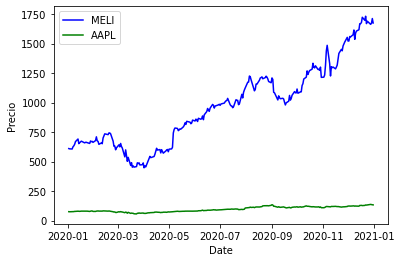

In [24]:
import matplotlib.pyplot as plt

# Serie temporal de precios de cierre
plt.plot('Date', 'Close', data=df_1, label='MELI', color='blue')
plt.plot('Date', 'Close', data=df_2, label='AAPL', color='green')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Precio')
plt.show()

In [21]:
# Retornos
variation_close_df_1 = df_1.Close.pct_change()*100 # pct_change calcula el cambio porcentual. Se multiplica por 100 para expresar en %
variation_close_df_2 = df_2.Close.pct_change()*100

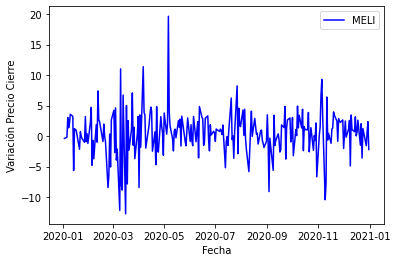

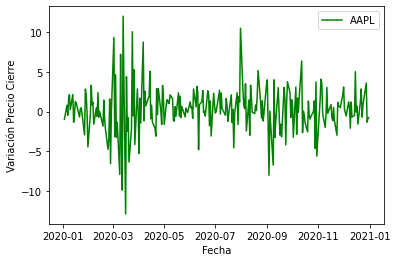

In [32]:
import pandas as pd

df_3 = pd.concat([df_1.Date, variation_close_df_1, variation_close_df_2], \
                 axis=1, keys=['date', 'MELI_close_variation',\
                               'AAPL_close_variation'])

# Gráfico de Variación de Precio de Cierre por día
# MELI
plt.figure(0)
plt.plot('date', 'MELI_close_variation', data=df_3, label='MELI', color='blue')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Variación Precio Cierre')
plt.show()

# APPL
plt.figure(1)
plt.plot('date', 'AAPL_close_variation', data=df_3, label='AAPL', color='green')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Variación Precio Cierre')
plt.show()

# Se observa que las acciones de MELI tienen una varación en sus precios de cierre
# de entre -10% a 20%, mientras que AAPL varía entre -10% y 10%.

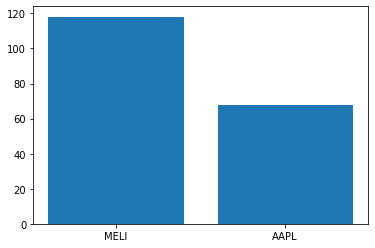

In [33]:
# Gráfico de Valor de cierre acumulado para todo el período
plt.bar(['MELI','AAPL'], [df_3.MELI_close_variation.sum(), df_3.AAPL_close_variation.sum()])
plt.show()

# Se observa que el porcentaje acumulado para la acción MELI es aproximadamente
# un 75% superior a la de AAPL.

Parece que va a ser más sencillo revisar algo en este espacio de retornos:

- Veamos estadísticas básicas (media, desviación estándar, moda).
- Hagamos un distplot de la distribución de los retornos.
- Una afirmación que se suele hacer con los retornos diarios de activos financieros, es que se asemejan bastante a una distribución normal. Es así en este caso?


In [34]:
# Descripción estadística básica
df_3.describe().round(2)

,MELI_close_variation,AAPL_close_variation
count,252.00,252.00
mean,0.47,0.27
std,3.67,2.94
min,-12.76,-12.86
25%,-1.18,-1.04
50%,0.71,0.17
75%,2.61,1.71
max,19.64,11.98


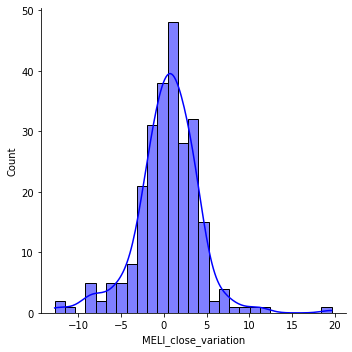

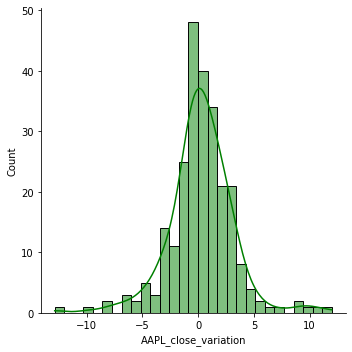

In [47]:
# Gráfico de distribución de retornos (displot)
import seaborn as sns

ax = sns.displot(data=df_3, x='MELI_close_variation', kde=True, color='blue')

ax = sns.displot(data=df_3, x='AAPL_close_variation', kde=True, color='green')

Observando los gráficos anteriores, se podría decir que los retornos siguen una distribución normal. Pero se decir hacer una prueba de hipótesis para verificar analíticamente esta observación. Se empleará a continuación un test de hipótesis de Shapiro-Wilk y la K^2 de D’Agostino. En todos los casos la hipótesis nula será:

$H_0$: *Los retornos siguen una distrubución normal*

In [45]:
# Test de Shapiro-Wilk

from scipy.stats import shapiro

# MELI
data = df_3.MELI_close_variation.dropna() # Elimino los registros NaN
stat, p = shapiro(data)
print('Estadisticos=%.3f, p=%.3f' % (stat, p))
# Interpretación
alpha = 0.05
if p > alpha:
   print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else:
   print('La muestra no parece Gaussiana o Normal (se rechaza la hipótesis nula H0)')

# APPL
data = df_3.AAPL_close_variation.dropna() # Elimino los registros NaN
stat, p = shapiro(data)
print('Estadisticos=%.3f, p=%.3f' % (stat, p))
# Interpretación
alpha = 0.05
if p > alpha:
   print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else:
   print('La muestra no parece Gaussiana o Normal (se rechaza la hipótesis nula H0)')

Estadisticos=0.939, p=0.000
La muestra no parece Gaussiana o Normal (se rechaza la hipótesis nula H0)
Estadisticos=0.940, p=0.000
La muestra no parece Gaussiana o Normal (se rechaza la hipótesis nula H0)


In [46]:
# Test K^2 de D’Agostino

from scipy.stats import normaltest

# MELI
data = df_3.MELI_close_variation.dropna() # Elimino los registros NaN
stat, p = normaltest(data)
print('Estadisticos=%.3f, p=%.3f' % (stat, p))
# Interpretación
alpha = 0.05
if p > alpha:
   print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else:
   print('La muestra no parece Gaussiana o Normal (se rechaza la hipótesis nula H0)')

# AAPL
data = df_3.AAPL_close_variation.dropna() # Elimino los registros NaN
stat, p = normaltest(data)
print('Estadisticos=%.3f, p=%.3f' % (stat, p))
# Interpretación
alpha = 0.05
if p > alpha:
   print('La muestra parece Gaussiana o Normal (no se rechaza la hipótesis nula H0)')
else:
   print('La muestra no parece Gaussiana o Normal (se rechaza la hipótesis nula H0)')

Estadisticos=29.769, p=0.000
La muestra no parece Gaussiana o Normal (se rechaza la hipótesis nula H0)
Estadisticos=27.310, p=0.000
La muestra no parece Gaussiana o Normal (se rechaza la hipótesis nula H0)


Se concluye que los retornos no siguen una distribución normal.

## Volatilidad de un activo financiero

A veces, además de saber cuánto dinero se ganó o perdió con algún activo financiero, también es de utilidad saber qué tan volátil fue ese retorno. Algunos activos tienen un buen rendimiento a lo largo del tiempo, pero a cambio de que su precio experimente subidas y bajadas muy pronunciadas. Para muchas personas, esto puede ser inaceptable, porque no todas tienen una idea de cuánto tiempo pueden dejar su dinero invertido en una acción o si lo necesitarán algún día en caso de emergencia.

Una buena medida de la volatilidad de un activo financiero es la **desviación estándar de sus retornos**. Podemos intentar graficar la media de los retornos vs. su volatilidad en un scatterplot. Podemos hacerlo para muchas acciones diferentes, o para ventanas de tiempo de una misma acción (usando [Rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) para nuestro DataFrame). 

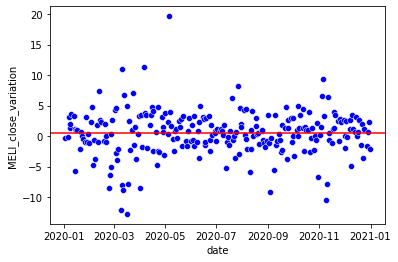

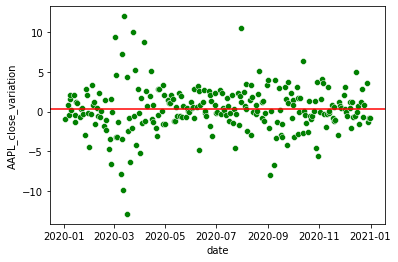

In [59]:
# Comparación volatilidad entre dos acciones

# MELI
plt.figure(0)
sns.scatterplot(data=df_3, x='date', y='MELI_close_variation', color='blue')
plt.axhline(df_3.MELI_close_variation.mean(), color='red',
            linestyle='-', label='Media')

# AAPL
plt.figure(1)
sns.scatterplot(data=df_3, x='date', y='AAPL_close_variation', color='green')
plt.axhline(df_3.AAPL_close_variation.mean(), color='red',
            linestyle='-', label='Media')

# Se observa mayor dispersión en el gráfico de la acción MELI.

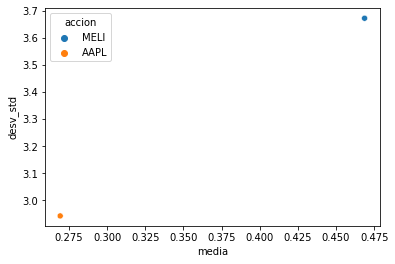

In [60]:
# El gráfico anterior puede resumirse con la media y la desviación estándar

df_4 = pd.DataFrame([['MELI', df_3.MELI_close_variation.mean(), df_3.MELI_close_variation.std()],\
                     ['AAPL', df_3.AAPL_close_variation.mean(), df_3.AAPL_close_variation.std()]],\
                    columns=['accion', 'media', 'desv_std'])

ax = sns.scatterplot(data=df_4, x="media", y="desv_std", hue="accion")

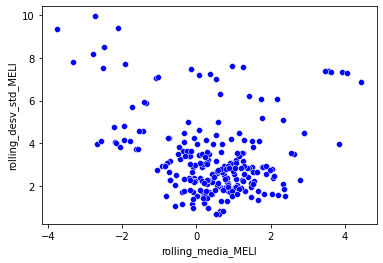

In [62]:
# Volatilidad por cada accion por separado. Se consideran ventanas de x días

# Rolling MELI y AAPL
ventana = 7
df_roll = df_3
df_roll['rolling_media_MELI'] = df_3.MELI_close_variation.rolling(ventana).mean() 
df_roll['rolling_desv_std_MELI'] = df_3.MELI_close_variation.rolling(ventana).std()
df_roll['rolling_media_AAPL'] = df_3.AAPL_close_variation.rolling(ventana).mean()
df_roll['rolling_desv_std_AAPL'] = df_3.AAPL_close_variation.rolling(ventana).std()

ax = sns.scatterplot(data=df_roll, x="rolling_media_MELI", y="rolling_desv_std_MELI", color='blue')

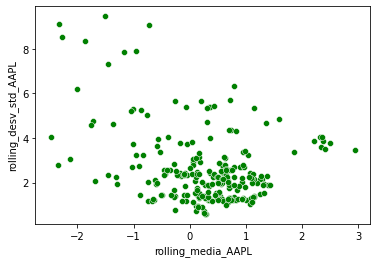

In [64]:
ax = sns.scatterplot(data=df_roll, x="rolling_media_AAPL", y="rolling_desv_std_AAPL", color='green')

## Sharpe Ratio

Este cociente fue ideado por William Sharpe (economista y ganador del Premio Nobel) para ayudar a entender el retorno de una inversión comparado con el riesgo de la misma. Se puede conseguir dividiendo el exeso de retorno (la diferencia entre el retorno del activo y el de un activo libre de riesgo) de una inversión por su volatilidad. En una primera aproximación podemos asumir que el retorno libre de riesgo es Cero y simplemente tomamos el cociente rendimiento / riesgo.

Este cociente se lee como "unidades de retorno que brinda un activo por cada unidad de riesgo asumida". De esa forma se obtiene un indicador que permite comparar activos de diferentes niveles de retorno y riesgo en un mismo espacio, y es una buena adición al gráfico de retorno vs. volatilidad como su "hue".

Valores altos de Sharpe Ratio siempre son buscados, porque representan una muy buena relación retorno-riesgo para una inversión, pero una de las "debilidades" que tiene es que se asume que los retornos tienen una distribución normal (esto se cumple?). Aún así, es una métrica muy utilizada en el mundo para evaluar la fortaleza tanto de activos individuales, como conjuntos de activos e incluso estrategias de trading.

Cómo podríamos modificar el scatterplot anterior para agregarlo?

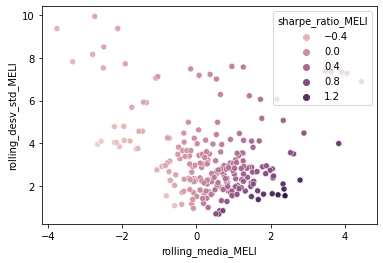

In [78]:
# Modifico df_roll, agregando sharpe_ratio
df_roll['sharpe_ratio_MELI'] = df_roll.rolling_media_MELI / df_roll.rolling_desv_std_MELI
df_roll['sharpe_ratio_AAPL'] = df_roll.rolling_media_AAPL / df_roll.rolling_desv_std_AAPL
df_roll.head(15)

ax = sns.scatterplot(data=df_roll, x="rolling_media_MELI", \
                     y="rolling_desv_std_MELI", hue='sharpe_ratio_MELI')

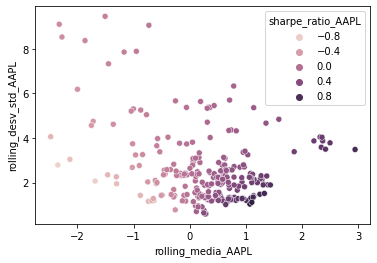

In [73]:
ax = sns.scatterplot(data=df_roll, x="rolling_media_AAPL", \
                     y="rolling_desv_std_AAPL", hue='sharpe_ratio_AAPL')

In [89]:
# Análisis de % de veces en que el Sharpe Ratio es mayor a uno, en el período 
# analizado y la ventana de tiempo fijada.

n_registros = df_roll.shape[0]
# MELI
n_great_than_1_sh_ratio = len(df_roll.sharpe_ratio_MELI[df_roll['sharpe_ratio_MELI'] > 1.0])
frecuencia_rentable = (n_great_than_1_sh_ratio / n_registros)*100
print('Frecuencia rentable MELI [%]: ', round(frecuencia_rentable, 2))

# AAPL
n_great_than_1_sh_ratio = len(df_roll.sharpe_ratio_AAPL[df_roll['sharpe_ratio_AAPL'] > 1.0])
frecuencia_rentable = (n_great_than_1_sh_ratio / n_registros)*100
print('Frecuencia rentable AAPL [%]: ', round(frecuencia_rentable, 2))

Frecuencia rentable MELI [%]:  3.16
Frecuencia rentable AAPL [%]:  0.4


Se observa que para una ventana de 7 días, la relación retorno-riesgo es mejor para la acción MELI. Aún así, la proporción de veces en que se presenta un Sharpe Ratio mayor a uno en todo el período es bastante baja.